In [1]:
!git clone https://github.com/rslim087a/track

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 34.86 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [2]:
!ls track

driving_log.csv  IMG


In [82]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import sys
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
datadir = "track"
#         ["merkez","sol","sağ","direksiyon","gaz kelebeği","geri","hız"]
columns = ["center","left","right","steering","throttle","reverse","speed"]
df = pd.read_csv(os.path.join(datadir,"driving_log.csv"))
df.columns = columns

pd.set_option("display.max_colwidth",-1)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_930.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_930.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_930.jpg,0.0,0.0,0.0,0.610506


In [63]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

df["center"] = df["center"].apply(path_leaf)
df["left"] = df["left"].apply(path_leaf)
df["right"] = df["right"].apply(path_leaf)

In [64]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
1,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
2,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
3,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
4,center_2018_07_16_17_11_43_930.jpg,left_2018_07_16_17_11_43_930.jpg,right_2018_07_16_17_11_43_930.jpg,0.0,0.0,0.0,0.610506


In [65]:
df["steering"].nunique(),df["steering"].max(),df["steering"].min()

(580, 1.0, -1.0)

In [66]:
num_bins = 25

hist, bins = np.histogram(df["steering"], num_bins)
hist,bins

(array([  35,    6,    6,    6,   13,    8,   24,   22,   53,  131,   99,
         158, 2989,  137,   86,  126,   54,   22,   19,    2,    9,    4,
           4,    6,   33]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]))

In [67]:
# Farklı bak !!
len(hist),len(bins)

(25, 26)

In [68]:
bins[1:],bins[:-1]

(array([-0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36, -0.28,
        -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,  0.44,
         0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92]))

In [69]:
center = (bins[1:] + bins[:-1]) * 0.5
len(center),len(hist),len(bins)

(25, 25, 26)

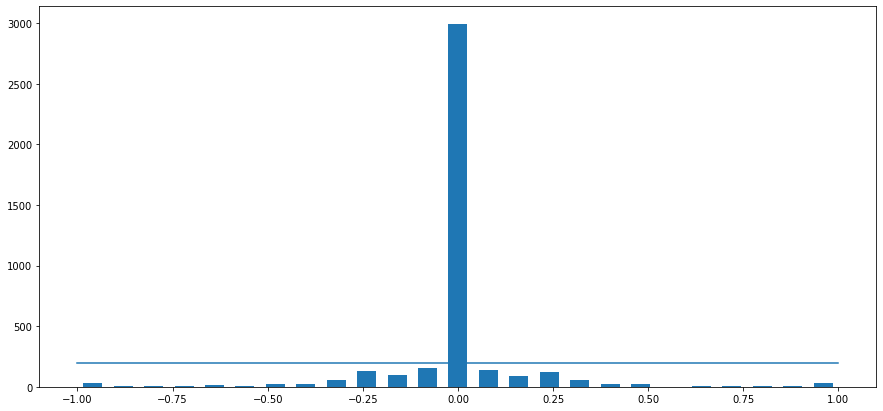

In [70]:
samples_per_bin = 200

plt.figure(figsize = (15,7))
plt.bar(center,hist,width = 0.05)
plt.plot( (np.min(df["steering"]), np.max(df["steering"])),(samples_per_bin,samples_per_bin) ,)
plt.show()

In [71]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [72]:
print("Total Data : ", len(df))

remove_list = []

samples_per_bin = 200
num_bins = 25

for j in range(num_bins):
    list_ = []
    for i in range(len(df["steering"])):
        
        # Bins arasındaki değeri istiyoruz yani -1 ile -0.92 arasında ve kendileride dahil !!!
        if df["steering"][i] >= bins[j] and df["steering"][i] <= bins[j+1]:
            list_.append(i)
    #print()
    list_ = shuffle(list_)
    #print("Shuflle : ", len(list_))
    list_ = list_[samples_per_bin:]
    #print("200 > :", len(list_))
    remove_list.extend(list_)
    #print()

print("Removed : ", len(remove_list))
df.drop(df.index[remove_list], inplace = True)
print("Remaning : ", len(df))

Total Data :  4052
Removed :  2789
Remaning :  1263


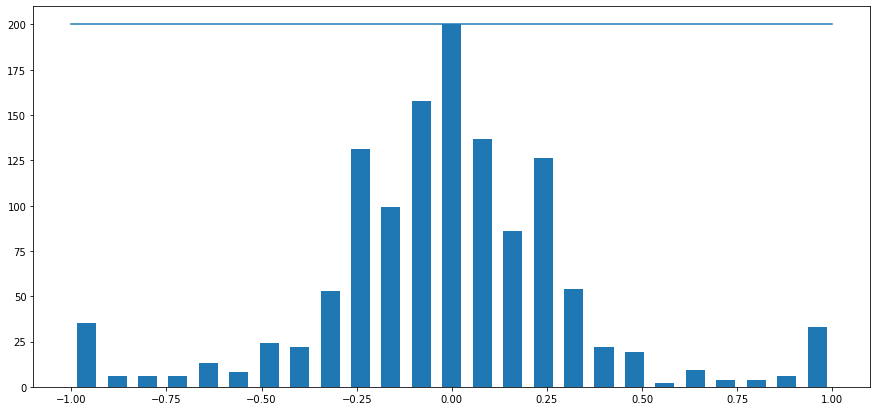

In [74]:
# Bunu yapmamızdaki amaç şu normalde 0 değeri çok fazla olması bizim eğitim verimiz için çok artı bir durum değil
# Aracın sağa sola gitmesi önemli 
# 0 değerinin çok olması yani düz gitme ihtimali her zaman daha çok fazla olması 
# Eğitimde bize sıkıntı oluşturur

hist, _ = np.histogram(df["steering"], num_bins)

plt.figure(figsize = (15,7))
plt.bar(center,hist,width = 0.05)
plt.plot( (np.min(df["steering"]), np.max(df["steering"])),(samples_per_bin,samples_per_bin) ,)
plt.show()

In [84]:
df.iloc[0]

center      center_2018_07_16_17_11_43_930.jpg
left        left_2018_07_16_17_11_43_930.jpg  
right       right_2018_07_16_17_11_43_930.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       0.610506                          
Name: 4, dtype: object

In [78]:
def load_img_steering(datadir, data):

    image_path = []
    steering = []
    for i in range(len(data)):

        indexed_data = data.iloc[i]
        center,left,right = indexed_data[0],indexed_data[1],indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))

    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)

    return image_paths, steerings

In [79]:
image_paths, steerings = load_img_steering(datadir + "/IMG", df)

In [85]:
X_train ,X_test , y_train, y_test = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 6)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1010,), (253,), (1010,), (253,))

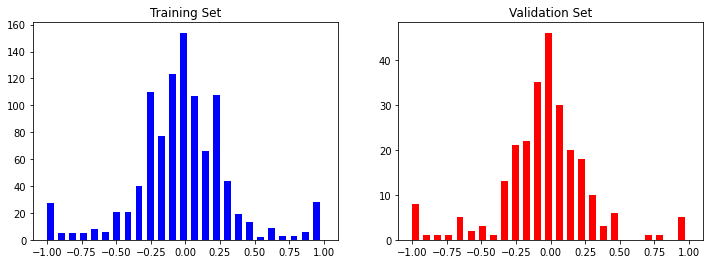

In [87]:
fig, axes = plt.subplots(1,2,figsize = (12,4))

axes[0].hist(y_train, bins = num_bins, width = 0.05 , color = "blue")
axes[0].set_title("Training Set")

axes[1].hist(y_test, bins = num_bins, width = 0.05 , color = "red")
axes[1].set_title("Validation Set")

plt.show()

In [112]:
import matplotlib.image as mpimg

def img_preprocess(img):

    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img = cv2.GaussianBlur(img,ksize = (3,3),sigmaX = 0)
    img = cv2.resize(img,(200,66))
    img = img / 255
    return img

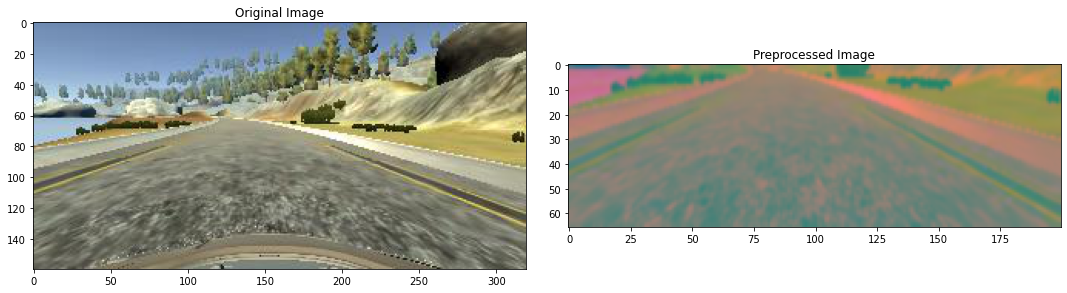

In [113]:
index = image_paths[100]

original_image= mpimg.imread(index)

preprocessed_image = img_preprocess(index)

fig ,axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")

axes[1].imshow(preprocessed_image)
axes[1].set_title("Preprocessed Image")

plt.show()

In [114]:
X_train = np.array(list(map(img_preprocess,X_train)))
X_test = np.array(list(map(img_preprocess,X_test)))

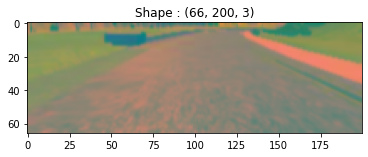

In [118]:
i = np.random.randint(0, len(X_train) - 1)

plt.imshow(X_train[i])
plt.title(f"Shape : {X_train[i].shape}")
plt.show()

In [146]:
def nvidia_model():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Convolution2D(filters = 24,  kernel_size = (5,5), strides = (2,2), activation = "elu", input_shape = (66,200,3)))
    model.add(tf.keras.layers.Convolution2D(filters = 36,  kernel_size = (5,5), strides = (2,2), activation = "elu"))
    model.add(tf.keras.layers.Convolution2D(filters = 48,  kernel_size = (5,5), strides = (2,2), activation = "elu"))
    model.add(tf.keras.layers.Convolution2D(filters = 64,  kernel_size = (3,3), activation = "elu"))
    
    model.add(tf.keras.layers.Convolution2D(filters = 64,  kernel_size = (3,3),  activation = "elu"))
    model.add(tf.keras.layers.Dropout(rate = 0.5))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units = 100, activation = "elu"))
    model.add(tf.keras.layers.Dropout(rate = 0.5))

    model.add(tf.keras.layers.Dense(units = 50, activation = "elu"))
    model.add(tf.keras.layers.Dropout(rate = 0.5))

    model.add(tf.keras.layers.Dense(units = 10, activation = "elu"))
    model.add(tf.keras.layers.Dropout(rate = 0.5))

    model.add(tf.keras.layers.Dense(units = 1))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = "mse")

    return model

In [147]:
model = nvidia_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_6 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

In [148]:
h = model.fit(X_train,y_train, epochs = 30, validation_data = (X_test,y_test), batch_size = 100, verbose = 1, shuffle = 1)

Epoch 1/30
11/11 [==============================] - 9s 711ms/step - loss: 1.7776 - val_loss: 0.1389
Epoch 2/30
11/11 [==============================] - 8s 701ms/step - loss: 0.4884 - val_loss: 0.1073
Epoch 3/30
11/11 [==============================] - 7s 673ms/step - loss: 0.2338 - val_loss: 0.1415
Epoch 4/30
11/11 [==============================] - 7s 662ms/step - loss: 0.2438 - val_loss: 0.1014
Epoch 5/30
11/11 [==============================] - 7s 678ms/step - loss: 0.1635 - val_loss: 0.0980
Epoch 6/30
11/11 [==============================] - 8s 680ms/step - loss: 0.1429 - val_loss: 0.0953
Epoch 7/30
11/11 [==============================] - 7s 674ms/step - loss: 0.1323 - val_loss: 0.0947
Epoch 8/30
11/11 [==============================] - 7s 677ms/step - loss: 0.1233 - val_loss: 0.0947
Epoch 9/30
11/11 [==============================] - 7s 673ms/step - loss: 0.1259 - val_loss: 0.0889
Epoch 10/30
11/11 [==============================] - 7s 674ms/step - loss: 0.1177 - val_loss: 0.0846

In [154]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,5))
    plt.subplot(121)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")
    plt.title("Loss Score")
    plt.legend(loc = "best")
    plt.xticks(range(0,epochs + 1))

    plt.tight_layout()
    plt.show()

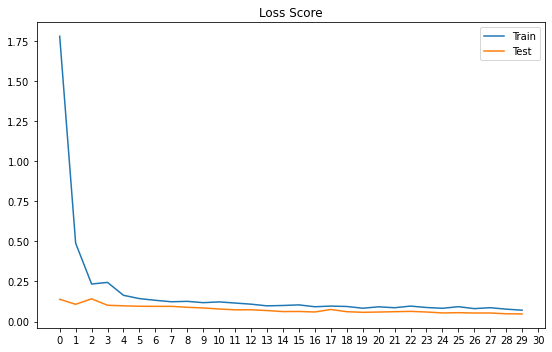

In [155]:
history_graph(h, 30 )

In [151]:
model.save("model.h5")

In [152]:
from google.colab import files

In [ ]:
files.download("model.h5")